In [129]:
import pandas as pd
import numpy as np
import warnings
import re
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

from dataset import get_dataframe

## Dataset scraped yearly
This dataset is created by scraping each year from IMDB starting from 1986-1987
This dataset contain 8475 unique movie titles

In [130]:
# dataset collected per year starting from 1986 - 1987
dataset1 = get_dataframe('./dataset')
dataset1.head(1)

,link,id,name,year,rating,genre,runtime,imdb_rate,description,Votes,...,meta.Opening Weekend USA:,meta.Gross USA:,meta.Cumulative Worldwide Gross:,meta.Production Co:,meta.Runtime:,meta.Sound Mix:,meta.Color:,meta.Aspect Ratio:,meta.storyline,meta.rating
0,http://www.imdb.com/title/tt0372784/,tt0372784,Batman Begins,2005,PG,"Action, Adventure",140,8.2,"After training with his mentor, Batman begins ...",1317445.0,...,4.874544e+09,206852432.0,373661946.0,"[Warner Bros., Syncopy, DC Comics]",140.0,"[DTS, Dolby Digital, SDDS, Sonics-DDP]",[Color],2.39 : 1,"When his parents are killed, billionaire playb...",PG


In [131]:
dataset1.shape

(8475, 28)

Sorted by year

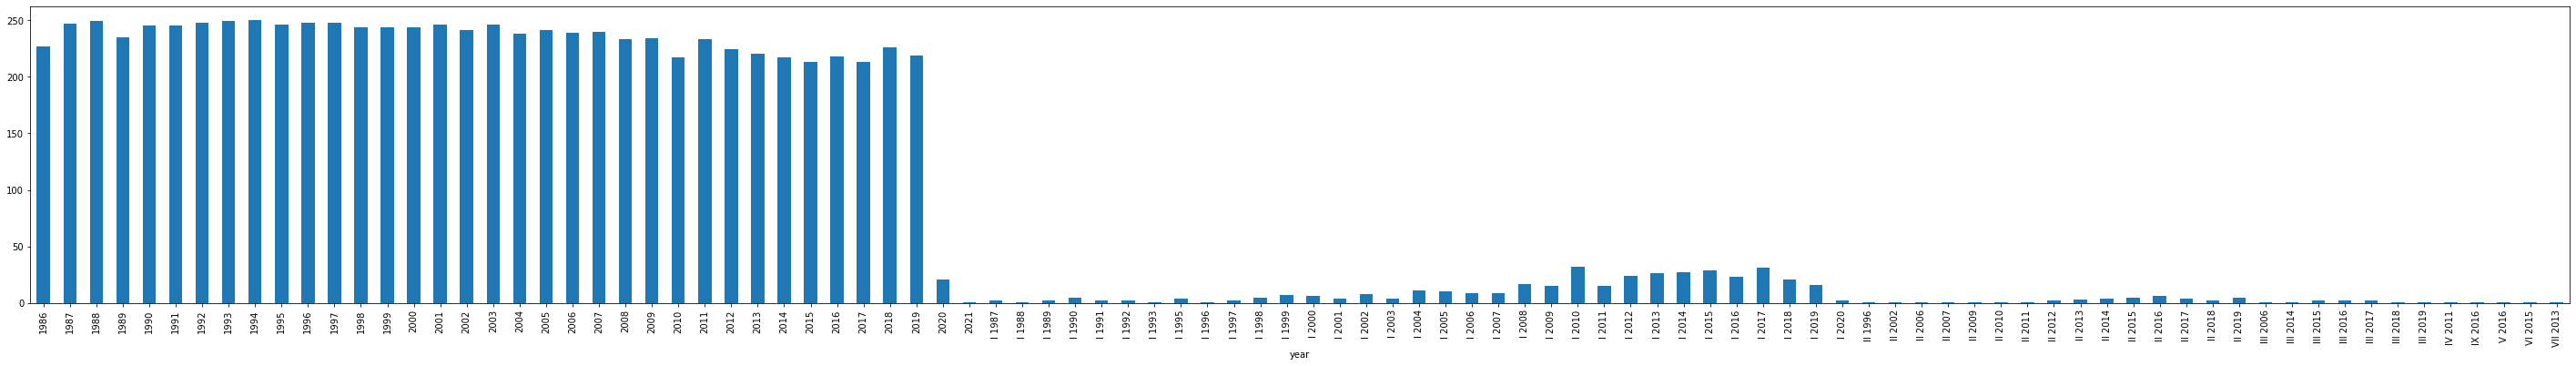

In [132]:
fig = plt.figure(figsize=(50,6))
dataset1.groupby('year')['id'].count().plot.bar(ylim=0)
plt.show()

Sorted by rating

In [133]:
# drop movies that does not have rating
dataset1 = dataset1[dataset1.rating != '']
dataset1 = dataset1[dataset1.description != '']
dataset1.shape

(8475, 28)

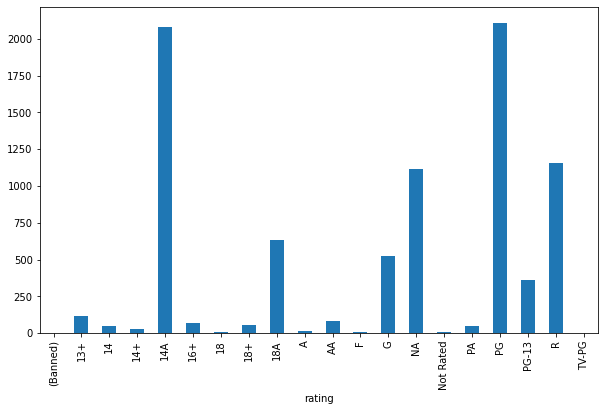

In [134]:
fig = plt.figure(figsize=(10,6))
dataset1.groupby('rating')['description'].count().plot.bar(ylim=0)
plt.show()

In [135]:
dataset1['rating'].unique()

array(['PG', 'G', '14A', '16+', '18A', '18+', 'R', 'PG-13', '13+', '14',
       'NA', 'PA', 'AA', 'A', '14+', '(Banned)', '18', 'Not Rated',
       'TV-PG', 'F'], dtype=object)

---

## Dataset scraped by IMDB advances search based on mpaa rating
https://www.imdb.com/search/title/
- With the advance search imdb allows to search following US mpaa ratings
- G, PG, PG-13, R, NC-17
- Additional features such as emotion was added

In [136]:
# dataset collected per year starting from 1986 - 1987
dataset2 = get_dataframe('./dataset_cleaned_emotions')
dataset2.head(1)

,link,id,name,year,rating,genre,runtime,imdb_rate,description,anticipation,...,meta.rating,Votes,Gross,anger,meta.Opening Weekend USA:,meta.Gross USA:,meta.Cumulative Worldwide Gross:,meta.Aspect Ratio:,trust,meta.Budget:
0,http://www.imdb.com/title/tt0099235/,tt0099235,The Cellar,1989,PG-13,Horror,85,4.4,A young boy finds an ancient Comanche monster ...,0.066667,...,PG-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
dataset2.shape

(15455, 41)

Sorted by year

In [138]:
# clean years
def clean_year_field( text_str ):
    res = [int(i) for i in text_str.split() if i.isdigit()]
#     text = re.sub('TV Movie', '', text_str )
#     text = text.strip()
    try:
        year = res[0]
        return year
    except:
        year = ''
    return year

year_vals = []
for i, year in dataset2['year'].iteritems():
    cleaned_year = clean_year_field( str(year) )
    dataset2.iloc[i]['year'] = cleaned_year
    year_vals.append({
        'year' : cleaned_year
    })
    
year_df = pd.DataFrame(year_vals)
year_df.head
dataset2['year'] = year_df['year']

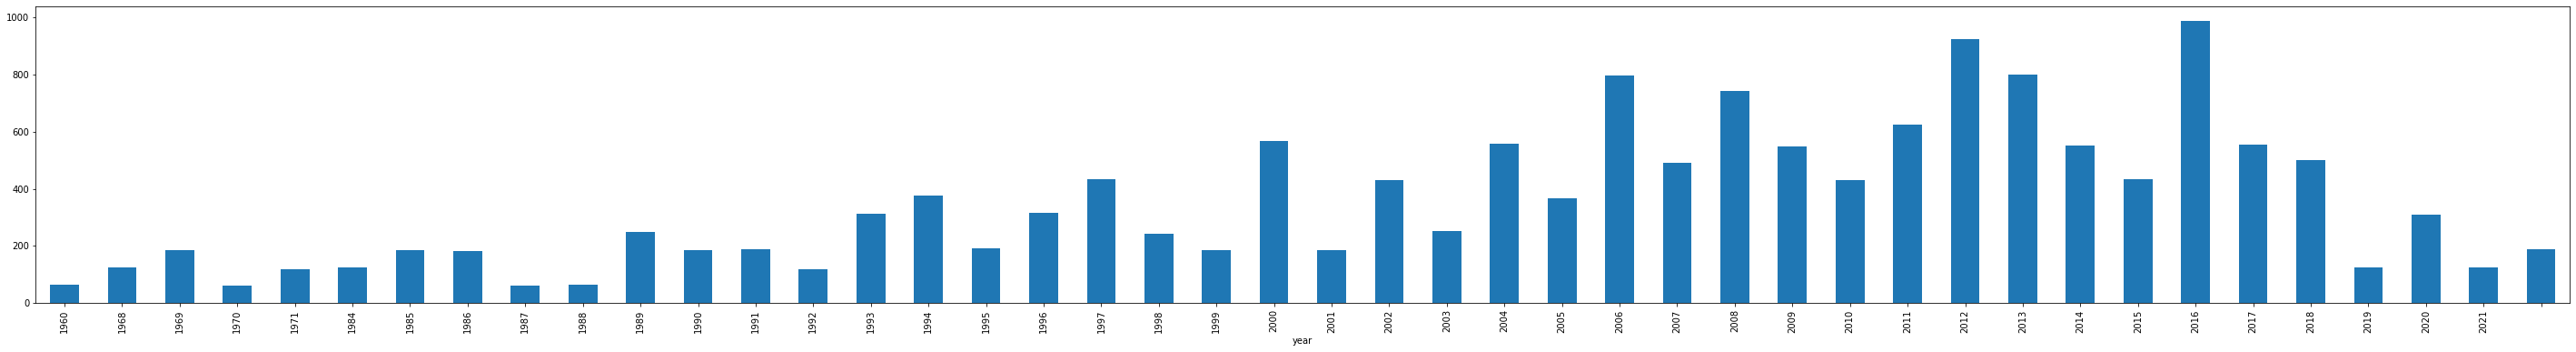

In [139]:
fig = plt.figure(figsize=(50,6))
dataset2.groupby('year')['id'].count().plot.bar(ylim=0)
plt.show()

Sorted by rating

In [140]:
# drop movies that does not have rating
dataset2 = dataset2[dataset2.rating != '']
dataset2 = dataset2[dataset2.description != '']
dataset2.shape

(15455, 41)

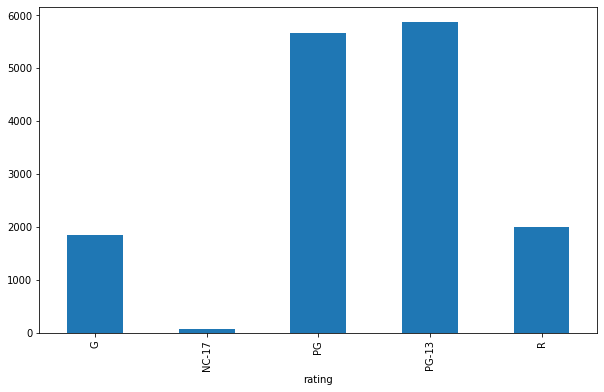

In [141]:
fig = plt.figure(figsize=(10,6))
dataset2.groupby('rating')['description'].count().plot.bar(ylim=0)
plt.show()

In [142]:
dataset1['rating'].unique()

array(['PG', 'G', '14A', '16+', '18A', '18+', 'R', 'PG-13', '13+', '14',
       'NA', 'PA', 'AA', 'A', '14+', '(Banned)', '18', 'Not Rated',
       'TV-PG', 'F'], dtype=object)

---

## Rotten Tomatoes dataset
This dataset is created by scraping rotten tomatoes website

In [143]:
dataset3 = pd.read_csv( './rtt_dataset/all_movie.csv' )
dataset3 = dataset3[['Title', 'Rating', 'Description', 'Year']]
dataset3.columns = dataset3.columns.str.strip()
dataset3.head(4)

,Title,Rating,Description,Year
0,The Mummy: Tomb of the Dragon Emperor,PG-13,The Fast and the Furious director Rob Cohen co...,2008
1,The Masked Saint,PG-13,The journey of a professional wrestler who bec...,2016
2,Spy Hard,PG-13,"Dead pan Leslie Nielsen stars as Dick Steele, ...",1996
3,Der Baader Meinhof Komplex (The Baader Meinhof...,R,Director Uli Edel teams with screenwriter Bern...,2008


In [144]:
dataset3.shape

(29810, 4)

Sorted by year

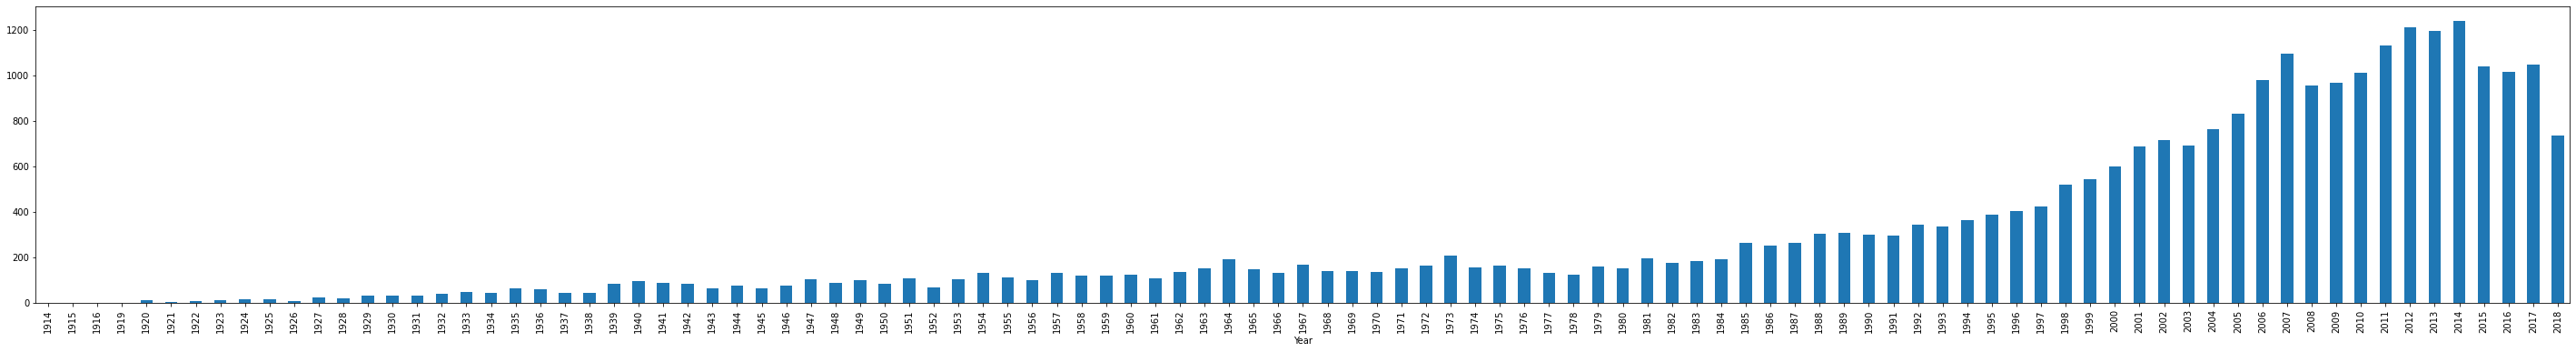

In [145]:
fig = plt.figure(figsize=(50,6))
dataset3.groupby('Year')['Title'].count().plot.bar(ylim=0)
plt.show()

In [146]:
# Cleanring
# clean mpaa ratings
mpaa_fix = {
    'PG-13 ' : 'PG-13',
    'R ' : 'R',
    'PG ': 'PG',
    'G ' : 'G',
    'NR ': 'NR',
    'NC17 ': 'NC17'
}
for i, rating in dataset3['Rating'].iteritems():
    if rating in mpaa_fix.keys():
        fix_val = mpaa_fix.get(rating)
        dataset3.iloc[i]['Rating'] = fix_val
dataset3['Rating'].unique()

array(['PG-13 ', 'PG-13', 'R ', 'NR', 'PG', 'G', 'PG ', 'R', 'G ', 'NR ',
       'NC17', 'NC17 '], dtype=object)

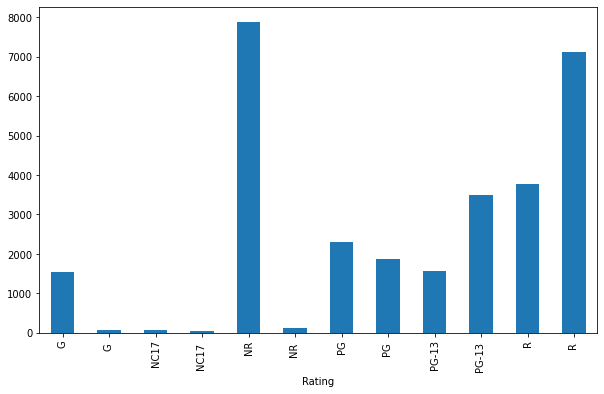

In [147]:
fig = plt.figure(figsize=(10,6))
dataset3.groupby('Rating')['Description'].count().plot.bar(ylim=0)
plt.show()

In [148]:
dataset1['rating'].unique()

array(['PG', 'G', '14A', '16+', '18A', '18+', 'R', 'PG-13', '13+', '14',
       'NA', 'PA', 'AA', 'A', '14+', '(Banned)', '18', 'Not Rated',
       'TV-PG', 'F'], dtype=object)